# 3-1. Cleaning
> Garbage In, Garbage Out

- 클리닝, 필터링 -> 특징 선택 (피처 엔지니어링)  
- [Amazing Feature Engineering](https://github.com/ashishpatel26/Amazing-Feature-Engineering)
- 결측값, 오염된 값으로 인해 잘못된 인사이트를 도출할 수 있음

## 결측치
1. 열, 행 전체
2. 단일 셀/레코드

### 탐색 및 제거하기

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.DataFrame({
    "col_A":["a", "b", "c", "d"],
    "col_B":[1, 2, np.NaN, 4],
    "col_C":["a1", np.NaN, np.NaN, "d4"],
    "col_D":[4, np.NaN, 2, 1]
})

df

,col_A,col_B,col_C,col_D
0,a,1.0,a1,4.0
1,b,2.0,NaN,NaN
2,c,NaN,NaN,2.0
3,d,4.0,d4,1.0


In [18]:
df.isnull()

,col_A,col_B,col_C,col_D
0,False,False,False,False
1,False,False,True,True
2,False,True,True,False
3,False,False,False,False


In [19]:
df.isnull().any()

col_A    False
col_B     True
col_C     True
col_D     True
dtype: bool

In [20]:
df.isnull().all()

col_A    False
col_B    False
col_C    False
col_D    False
dtype: bool

In [21]:
df.fillna("결측치")

,col_A,col_B,col_C,col_D
0,a,1.0,a1,4.0
1,b,2.0,결측치,결측치
2,c,결측치,결측치,2.0
3,d,4.0,d4,1.0


In [22]:
df.dropna(axis=0)

,col_A,col_B,col_C,col_D
0,a,1.0,a1,4.0
3,d,4.0,d4,1.0


In [23]:
df.dropna(axis=1)

,col_A
0,a
1,b
2,c
3,d


### 결측치 대체

In [32]:
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

out_imp = imputer.fit_transform(df[["col_B", "col_D"]])
imp_df = pd.DataFrame(out_imp, columns=["col_B", "col_D"])

fill_df = pd.concat([df[["col_A", "col_C"]], imp_df], axis=1)
fill_df

,col_A,col_C,col_B,col_D
0,a,a1,1.000000,4.000000
1,b,NaN,2.000000,2.333333
2,c,NaN,2.333333,2.000000
3,d,d4,4.000000,1.000000


### 스케일링
- 스케일 불변 -> 상수를 곱해도 성질이 변하지 않는 경우
- 큰 값들은, 매개변수 공간을 독점
- 각 특징을 비슷한 스케일로 적용
- 정규화, 표준화

In [33]:
iris_data = sns.load_dataset("iris")

In [35]:
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
for col in cols:
    print(f"{col}: {iris_data[col].min()} / {iris_data[col].max()}")

sepal_length: 4.3 / 7.9
sepal_width: 2.0 / 4.4
petal_length: 1.0 / 6.9
petal_width: 0.1 / 2.5


#### 정규화(Normalization)
- 0 ~ 1 or -1 ~ +1에 위치하도록 특징 공간을 리스케일링
- MinMaxScaler
$$x_{i, scaled}={{x_{i, original}-min_y}\over{max_y-min_y}}$$
- 특징의 단위가 다른 경우

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # 스케일러 정의
out_scaled = scaler.fit_transform(iris_data[cols])

nor_iris = pd.DataFrame(out_scaled, columns=cols)
nor_iris

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [44]:
for col in cols:
    print(f"{col}: {nor_iris[col].min()} / {nor_iris[col].max()}")

sepal_length: 0.0 / 1.0
sepal_width: 0.0 / 1.0
petal_length: 0.0 / 1.0
petal_width: 0.0 / 1.0


#### 표준화(Standardiztion)
- 단위 분산에 대해 펼치고, 0에 중간을 맞춤 -> 정규분포의 속성을 갖도록
- Z-Score (표준점수)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
out_scaled = scaler.fit_transform(iris_data[cols])

std_iris = pd.DataFrame(out_scaled, columns=cols)
std_iris

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [46]:
for col in cols:
    print(f"{col}: {std_iris[col].min()} / {std_iris[col].max()}")

sepal_length: -1.870024133847019 / 2.4920192021244283
sepal_width: -2.433947141908088 / 3.090775248299425
petal_length: -1.567576234277175 / 1.7858319536254108
petal_width: -1.4470764792980408 / 1.7120959436691794


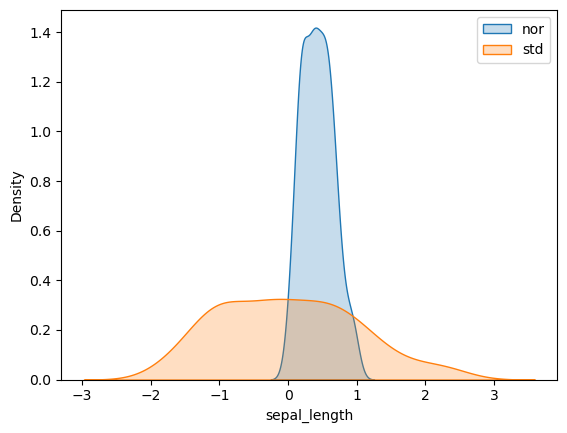

In [57]:
sns.kdeplot(data=nor_iris, x=cols[0], fill=True)
sns.kdeplot(data=std_iris, x=cols[0], fill=True)
plt.legend(["nor", "std"])
plt.show()

### 카테고리 데이터
- 대부분의 ML/DL 기법들은 연속 변수와 정수 입력에 대해 만들어짐
- 인코딩 적용

In [70]:
# 원-핫 인코딩
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
out_ohe = ohe.fit_transform(iris_data["species"].values.reshape(-1, 1))

pd.DataFrame(out_ohe, columns=["setosa", "versicolor", "virginica"])

,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


In [71]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

out_int = le.fit_transform([1, 2, 3, 4, 3, 2, 1])
print(out_int)

out_str = le.fit_transform(["red", "blue", "black", "red", "blue"])
print(out_str)

[0 1 2 3 2 1 0]
[2 1 0 2 1]


### 상관계수
- 두 변수 간 일치성의 강도

In [73]:
iris_data[cols].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


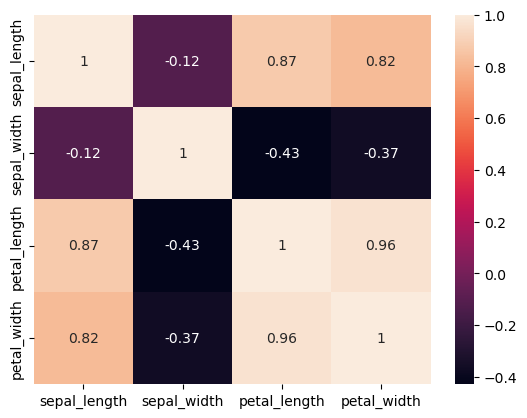

In [76]:
sns.heatmap(iris_data[cols].corr(), annot=True);